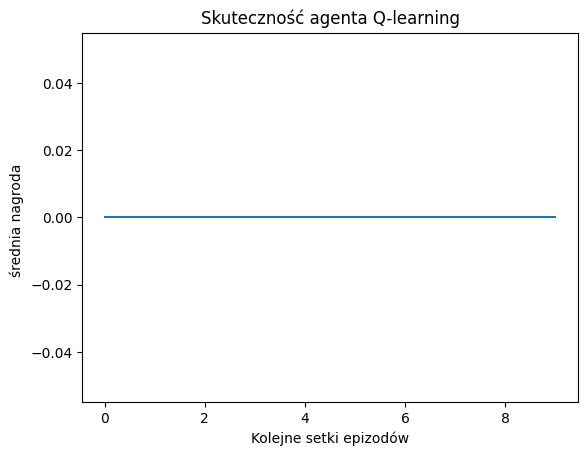

: 

In [ ]:
# Zadanie 2: Eksploracja CartPole-v1
import gymnasium as gym
import time

env = gym.make("CartPole-v1", render_mode="human")
obs, info = env.reset()
for _ in range (100):
	action = env.action_space.sample()
	obs, reward, terminated, truncated, info = env.step(action)
	time.sleep(0.01)
	done = terminated or truncated
	if done:
		obs, info = env.reset()
	
# Zadanie 3: Implementacja Q-learningu na FrozenLake-v1
import numpy as np
#import gymnasium as gym

env = gym.make("FrozenLake-v1", is_slippery = False)
n_states = env.observation_space.n
n_actions = env.action_space.n

Q = np.zeros((n_states, n_actions))

epsilon = 0.1
alpha = 0.1
gamma = 0.99
episodes = 1000

rewards = []

for episode in range (episodes):
	state, info = env.reset()
	done = False
	total_reward = 0
	while not done:
		if np.random.uniform(0, 1) < epsilon:
			action = env.action_space.sample()
		else:
			action = np.argmax(Q[state])
		next_state, reward, terminated, truncated, info = env.step(action)
		done = terminated or truncated
		
		Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q [state, action])
		state = next_state
		total_reward += reward
		
	rewards.append(total_reward)

# Zadanie 4: Ewaluacja
import matplotlib.pyplot as plt

avg_rewards = [np.mean(rewards[i:i+100]) for i in range(0, episodes, 100)]
plt.plot(avg_rewards)
plt.xlabel("Kolejne setki epizodów")
plt.ylabel("średnia nagroda ")
plt.title("Skuteczność agenta Q-learning")
plt.show()